<a href="https://colab.research.google.com/github/GunjalDarshan/Date-prediction-try/blob/main/new_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv(r"/new dddddd.csv")
data.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,...,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,IncomeGroup,CreditRating,Unnamed: 25,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,23.0,0.0,532.0,51.0,8.3,0.3,...,0.0,No,Yes,Yes,No,5,5-Low,NaN,Other,No
1,3000018,55.23,570.0,72.0,0.0,0.0,38.0,0.0,9.7,0.0,...,0.0,No,No,No,No,6,1-Highest,NaN,Professional,No
2,3000034,97.34,1039.0,50.0,420.0,0.0,198.0,23.3,12.7,0.3,...,24.0,No,No,No,No,4,3-Good,NaN,Crafts,Yes
3,3000070,35.59,153.0,30.0,16.0,0.0,30.0,7.3,2.0,0.0,...,0.0,Yes,Yes,Yes,Yes,4,1-Highest,NaN,Other,No
4,3000074,55.27,1213.0,50.0,0.0,1.3,169.0,1.0,2.7,0.0,...,0.0,No,Yes,Yes,No,3,1-Highest,NaN,Other,No


In [ ]:
data.shape

(20000, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            20000 non-null  int64  
 1   MonthlyRevenue        19940 non-null  float64
 2   MonthlyMinutes        19940 non-null  float64
 3   TotalRecurringCharge  19940 non-null  float64
 4   OverageMinutes        19940 non-null  float64
 5   RoamingCalls          19940 non-null  float64
 6   PercChangeMinutes     19865 non-null  float64
 7   PercChangeRevenues    19865 non-null  float64
 8   DroppedCalls          20000 non-null  float64
 9   ThreewayCalls         20000 non-null  float64
 10  ReceivedCalls         20000 non-null  float64
 11  OutboundCalls         20000 non-null  float64
 12  MonthsInService       20000 non-null  int64  
 13  UniqueSubs            20000 non-null  int64  
 14  ActiveSubs            20000 non-null  int64  
 15  ServiceArea        

In [ ]:
data.isna().sum()

CustomerID                  0
MonthlyRevenue             60
MonthlyMinutes             60
TotalRecurringCharge       60
OverageMinutes             60
RoamingCalls               60
PercChangeMinutes         135
PercChangeRevenues        135
DroppedCalls                0
ThreewayCalls               0
ReceivedCalls               0
OutboundCalls               0
MonthsInService             0
UniqueSubs                  0
ActiveSubs                  0
ServiceArea                 4
CurrentEquipmentDays        0
AgeHH1                    335
AgeHH2                    335
ChildrenInHH                0
BuysViaMailOrder            0
RespondsToMailOffers        0
OptOutMailings              0
IncomeGroup                 0
CreditRating                0
Unnamed: 25             20000
Occupation                  0
MaritalStatus               0
dtype: int64

In [ ]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,MonthsInService,UniqueSubs,ActiveSubs,CurrentEquipmentDays,AgeHH1,AgeHH2,IncomeGroup,Unnamed: 25
CustomerID,1.000000,-0.004112,0.086184,0.049612,0.001569,0.000426,-0.004019,0.007979,0.054843,0.050171,0.048006,0.046432,-0.756158,-0.019592,-0.035080,-0.401875,-0.123407,-0.090587,-0.138498,NaN
MonthlyRevenue,-0.004112,1.000000,0.707644,0.647119,0.790694,0.269783,0.001555,-0.016242,0.461516,0.227051,0.612597,0.512518,0.003929,-0.015913,-0.039903,-0.218059,-0.109955,-0.096821,-0.090426,NaN
MonthlyMinutes,0.086184,0.707644,1.000000,0.574628,0.560568,0.122262,-0.008803,-0.017698,0.607270,0.323455,0.842502,0.712031,-0.071542,-0.033598,-0.066526,-0.304384,-0.171498,-0.145646,-0.150932,NaN
TotalRecurringCharge,0.049612,0.647119,0.574628,1.000000,0.198067,0.098958,-0.007063,-0.021362,0.354420,0.157625,0.489610,0.416364,-0.045921,-0.018313,-0.052550,-0.246179,-0.107010,-0.095835,-0.078153,NaN
OverageMinutes,0.001569,0.790694,0.560568,0.198067,1.000000,0.083500,0.014535,0.007971,0.368791,0.247441,0.514332,0.404336,-0.003175,-0.005599,-0.014873,-0.120990,-0.067915,-0.059179,-0.062339,NaN
RoamingCalls,0.000426,0.269783,0.122262,0.098958,0.083500,1.000000,-0.036777,-0.074996,0.088502,0.019656,0.068995,0.055477,-0.007466,-0.004836,-0.003274,-0.034275,-0.023290,-0.013791,-0.022013,NaN
PercChangeMinutes,-0.004019,0.001555,-0.008803,-0.007063,0.014535,-0.036777,1.000000,0.605725,-0.065371,-0.019639,-0.079044,-0.058606,0.005493,0.004764,0.003433,-0.014451,0.011385,0.014506,0.015075,NaN
PercChangeRevenues,0.007979,-0.016242,-0.017698,-0.021362,0.007971,-0.074996,0.605725,1.000000,-0.041133,-0.010820,-0.048872,-0.045039,-0.005673,-0.000258,-0.000806,-0.000846,0.009218,0.006691,0.007988,NaN
DroppedCalls,0.054843,0.461516,0.607270,0.354420,0.368791,0.088502,-0.065371,-0.041133,1.000000,0.314776,0.538538,0.580037,-0.042123,-0.023345,-0.044194,-0.210174,-0.114294,-0.103313,-0.094883,NaN
ThreewayCalls,0.050171,0.227051,0.323455,0.157625,0.247441,0.019656,-0.019639,-0.010820,0.314776,1.000000,0.295710,0.280722,-0.053941,-0.013913,-0.017298,-0.106927,-0.050400,-0.057073,-0.070182,NaN


In [ ]:
col = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes', 'RoamingCalls','PercChangeMinutes','PercChangeRevenues']

data[col] = data[col].fillna(0)

In [ ]:
data.isna().sum()

CustomerID                  0
MonthlyRevenue              0
MonthlyMinutes              0
TotalRecurringCharge        0
OverageMinutes              0
RoamingCalls                0
PercChangeMinutes           0
PercChangeRevenues          0
DroppedCalls                0
ThreewayCalls               0
ReceivedCalls               0
OutboundCalls               0
MonthsInService             0
UniqueSubs                  0
ActiveSubs                  0
ServiceArea                 4
CurrentEquipmentDays        0
AgeHH1                    335
AgeHH2                    335
ChildrenInHH                0
BuysViaMailOrder            0
RespondsToMailOffers        0
OptOutMailings              0
IncomeGroup                 0
CreditRating                0
Unnamed: 25             20000
Occupation                  0
MaritalStatus               0
dtype: int64

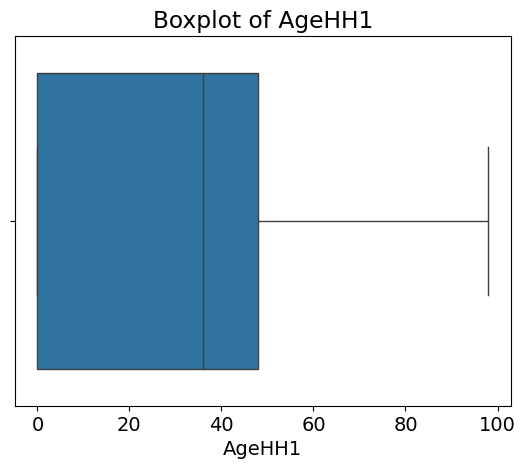

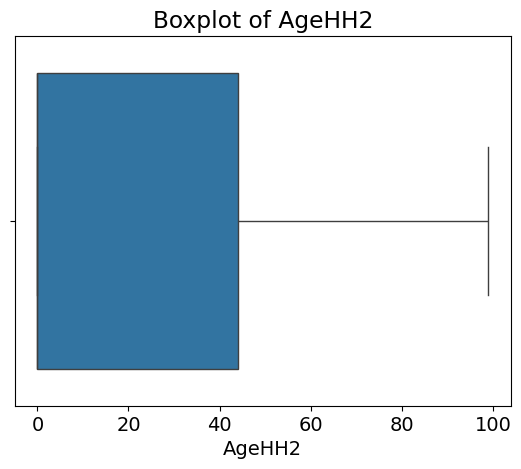

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['AgeHH1'])
plt.title('Boxplot of AgeHH1')
plt.show()

sns.boxplot(x=data['AgeHH2'])
plt.title('Boxplot of AgeHH2')
plt.show()

In [ ]:
data['AgeHH1'].fillna(data['AgeHH1'].mean(), inplace=True)
data['AgeHH2'].fillna(data['AgeHH2'].mean(), inplace=True)


In [ ]:
data['AgeHH1'] = data['AgeHH1'].round().astype(int)
data['AgeHH2'] = data['AgeHH2'].round().astype(int)

In [ ]:
# Assuming 'telecom_data' is your DataFrame
data.drop(data[data['AgeHH1'] == 0].index, inplace=True)
data.AgeHH1.unique()

array([30, 56, 38, 46, 58, 50, 60, 54, 32, 24, 40, 28, 52, 34, 42, 48, 64,
       36, 70, 31, 66, 22, 44, 26, 62, 68, 72, 80, 76, 98, 74, 78, 82, 84,
       20, 18, 86, 88, 90, 96, 92, 94])

In [ ]:
data.isna().sum()

CustomerID                  0
MonthlyRevenue              0
MonthlyMinutes              0
TotalRecurringCharge        0
OverageMinutes              0
RoamingCalls                0
PercChangeMinutes           0
PercChangeRevenues          0
DroppedCalls                0
ThreewayCalls               0
ReceivedCalls               0
OutboundCalls               0
MonthsInService             0
UniqueSubs                  0
ActiveSubs                  0
ServiceArea                 3
CurrentEquipmentDays        0
AgeHH1                      0
AgeHH2                      0
ChildrenInHH                0
BuysViaMailOrder            0
RespondsToMailOffers        0
OptOutMailings              0
IncomeGroup                 0
CreditRating                0
Unnamed: 25             14600
Occupation                  0
MaritalStatus               0
dtype: int64

In [ ]:
#data.drop('Unnamed: 25', axis=1, inplace=True)


In [ ]:
data.head(10)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,ThreewayCalls,...,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,IncomeGroup,CreditRating,Unnamed: 25,Occupation,MaritalStatus
0,3000006,57.49,483.0,37.0,23.0,0.0,532.0,51.0,8.3,0.3,...,0,No,Yes,Yes,No,5,5-Low,NaN,Other,No
1,3000018,55.23,570.0,72.0,0.0,0.0,38.0,0.0,9.7,0.0,...,0,No,No,No,No,6,1-Highest,NaN,Professional,No
2,3000034,97.34,1039.0,50.0,420.0,0.0,198.0,23.3,12.7,0.3,...,24,No,No,No,No,4,3-Good,NaN,Crafts,Yes
3,3000070,35.59,153.0,30.0,16.0,0.0,30.0,7.3,2.0,0.0,...,0,Yes,Yes,Yes,Yes,4,1-Highest,NaN,Other,No
4,3000074,55.27,1213.0,50.0,0.0,1.3,169.0,1.0,2.7,0.0,...,0,No,Yes,Yes,No,3,1-Highest,NaN,Other,No
5,3000086,60.19,1424.0,56.0,0.0,0.0,-1134.0,-55.2,23.7,0.0,...,52,No,Yes,Yes,No,5,5-Low,NaN,Other,Yes
7,3000110,37.66,972.0,36.0,5.0,0.0,25.0,-1.7,4.0,0.0,...,0,No,No,No,No,1,1-Highest,NaN,Other,No
8,3000246,42.88,406.0,40.0,54.0,0.0,88.0,3.6,0.7,0.0,...,48,Yes,Yes,Yes,No,5,4-Medium,NaN,Professional,Yes
10,3000258,54.96,244.0,52.0,0.0,0.0,15.0,2.0,0.7,0.0,...,80,No,Yes,Yes,No,6,1-Highest,NaN,Professional,No
11,3000274,50.48,380.0,60.0,0.0,0.0,93.0,-0.5,4.0,0.0,...,48,Yes,Yes,Yes,No,6,1-Highest,NaN,Professional,Yes


In [ ]:
X=data[["MonthlyRevenue","MonthlyMinutes","AgeHH1"]]
X

,MonthlyRevenue,MonthlyMinutes,AgeHH1
0,57.49,483.0,30
1,55.23,570.0,56
2,97.34,1039.0,38
3,35.59,153.0,46
4,55.27,1213.0,58
...,...,...,...
19994,0.00,0.0,46
19995,85.15,815.0,64
19996,0.00,0.0,34
19998,0.00,0.0,28


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

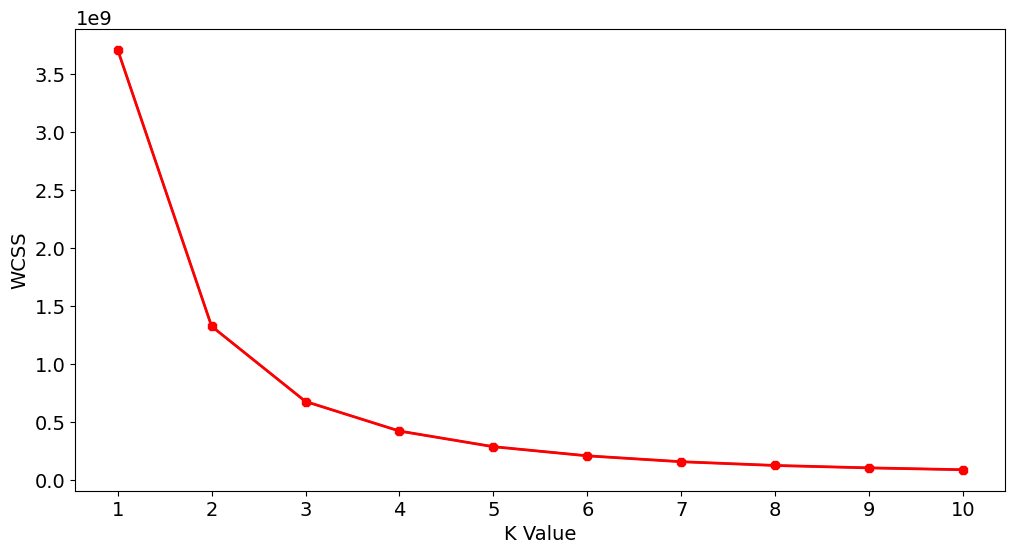

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.5807005141854775


In [ ]:
df_plot = X
df_plot['cluster'] = y_kmeans
df_plot['CustomerID']=data['CustomerID']
df_plot

<ipython-input-21-74474e709b22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['cluster'] = y_kmeans
<ipython-input-21-74474e709b22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['CustomerID']=data['CustomerID']


,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
0,57.49,483.0,30,2,3000006
1,55.23,570.0,56,2,3000018
2,97.34,1039.0,38,1,3000034
3,35.59,153.0,46,0,3000070
4,55.27,1213.0,58,1,3000074
...,...,...,...,...,...
19994,0.00,0.0,46,0,3399930
19995,85.15,815.0,64,2,3399938
19996,0.00,0.0,34,0,3399950
19998,0.00,0.0,28,0,3399970


In [ ]:
df_plot[['MonthlyRevenue','cluster','MonthlyMinutes']].head(30)

,MonthlyRevenue,cluster,MonthlyMinutes
0,57.49,2,483.0
1,55.23,2,570.0
2,97.34,1,1039.0
3,35.59,0,153.0
4,55.27,1,1213.0
5,60.19,1,1424.0
7,37.66,1,972.0
8,42.88,2,406.0
10,54.96,0,244.0
11,50.48,2,380.0


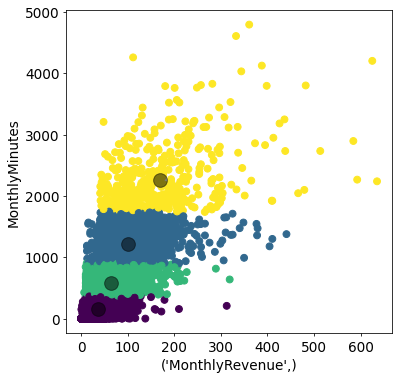

In [ ]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(df_scatter[:,0], df_scatter[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='MonthlyRevenue',
ylabel='MonthlyMinutes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

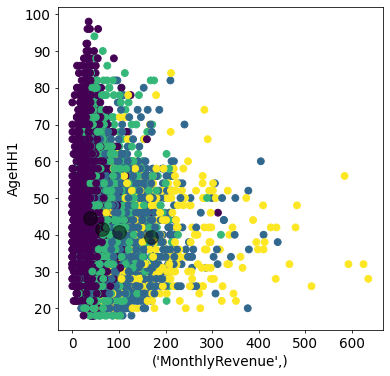

In [ ]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(X['MonthlyRevenue'], X['AgeHH1'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='MonthlyRevenue',
ylabel='AgeHH1'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

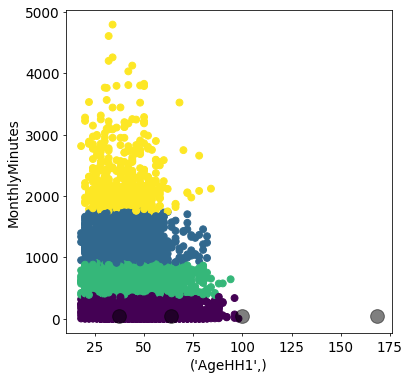

In [ ]:
import matplotlib.pyplot as plt
df_scatter = np.array(df_plot)
plt.figure(figsize=(6, 6), dpi=70)
plt.scatter(X['AgeHH1'], X['MonthlyMinutes'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,2], c='black', s=200, alpha=0.5, label ='centroid');
xlabel='AgeHH1',
ylabel='MonthlyMinutes'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='MonthlyRevenue', y='MonthlyMinutes', z='AgeHH1', color='cluster', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
cust0=df_plot[df_plot["cluster"]==0]
print('Number of customer in 0st group=', len(cust0))
print('They are -', cust0["CustomerID"].values)
print("--------------------------------------------")
cust1=df_plot[df_plot["cluster"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df_plot[df_plot["cluster"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df_plot[df_plot["cluster"]==3]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 0st group= 7992
They are - [3000070 3000258 3000366 ... 3399950 3399970 3399986]
--------------------------------------------
Number of customer in 1st group= 1749
They are - [3000034 3000074 3000086 ... 3398566 3398606 3398850]
--------------------------------------------
Number of customer in 2nd group= 4398
They are - [3000006 3000018 3000246 ... 3399294 3399862 3399938]
--------------------------------------------
Number of customer in 3rd group= 461
They are - [3000342 3000702 3000754 3000798 3001042 3001362 3001538 3001622 3001778
 3001994 3002150 3002238 3002550 3002566 3003290 3003770 3003826 3004422
 3004806 3006094 3006782 3007514 3009582 3009938 3010514 3010926 3010942
 3011714 3012734 3012990 3013726 3013770 3014230 3014662 3016018 3016038
 3016246 3018610 3020342 3021154 3021294 3022770 3023054 3023366 3024570
 3025422 3025830 3025890 3026182 3027930 3029046 3029906 3032398 3034294
 3034446 3034458 3034846 3035594 3036274 3037650 3038566 3039222 30425

In [ ]:
cust3

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
14,97.59,1804.0,24,3,3000342
34,109.47,2298.0,38,3,3000702
36,111.94,2060.0,36,3,3000754
38,166.43,2746.0,70,3,3000798
49,88.71,2215.0,56,3,3001042
...,...,...,...,...,...
19742,78.89,2300.0,30,3,3394466
19748,72.94,2712.0,46,3,3394610
19819,226.32,1924.0,48,3,3396326
19913,373.21,2858.0,50,3,3398254


In [ ]:
cust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 14 to 19926
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyRevenue  461 non-null    float64
 1   MonthlyMinutes  461 non-null    float64
 2   AgeHH1          461 non-null    int64  
 3   cluster         461 non-null    int32  
 4   CustomerID      461 non-null    int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 19.8 KB


In [ ]:
cust3.shape

(461, 5)

In [ ]:
descriptive_stats = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].describe()
print(descriptive_stats)


       MonthlyRevenue  MonthlyMinutes      AgeHH1
count      461.000000      461.000000  461.000000
mean       168.411367     2263.824295   39.325380
std         93.686927      511.636052   11.367879
min         40.830000     1738.000000   18.000000
25%        103.910000     1901.000000   30.000000
50%        147.830000     2108.000000   38.000000
75%        208.430000     2449.000000   48.000000
max        635.060000     4792.000000   84.000000


In [ ]:
mean_values = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].mean()
median_values = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].median()
std_dev_values = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].std()
min_values = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].min()
max_values = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].max()
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation values:\n", std_dev_values)
print("\nMinimum values:\n", min_values)
print("\nMaximum values:\n", max_values)


Mean values:
 MonthlyRevenue     168.411367
MonthlyMinutes    2263.824295
AgeHH1              39.325380
dtype: float64

Median values:
 MonthlyRevenue     147.83
MonthlyMinutes    2108.00
AgeHH1              38.00
dtype: float64

Standard deviation values:
 MonthlyRevenue     93.686927
MonthlyMinutes    511.636052
AgeHH1             11.367879
dtype: float64

Minimum values:
 MonthlyRevenue      40.83
MonthlyMinutes    1738.00
AgeHH1              18.00
dtype: float64

Maximum values:
 MonthlyRevenue     635.06
MonthlyMinutes    4792.00
AgeHH1              84.00
dtype: float64


In [ ]:
# Assuming 'cust3' is your DataFrame
correlation_matrix = cust3[['MonthlyRevenue', 'MonthlyMinutes', 'AgeHH1']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract specific correlations
correlation_monthlyrevenue_minutes = cust3['MonthlyRevenue'].corr(cust3['MonthlyMinutes'])
correlation_agehh1_monthlyrevenue = cust3['AgeHH1'].corr(cust3['MonthlyRevenue'])
correlation_agehh1_minutes = cust3['AgeHH1'].corr(cust3['MonthlyMinutes'])

# Display specific correlations
print("\nCorrelation between MonthlyRevenue and MonthlyMinutes:", correlation_monthlyrevenue_minutes)
print("Correlation between AgeHH1 and MonthlyRevenue:", correlation_agehh1_monthlyrevenue)
print("Correlation between AgeHH1 and MonthlyMinutes:", correlation_agehh1_minutes)


Correlation Matrix:
                MonthlyRevenue  MonthlyMinutes    AgeHH1
MonthlyRevenue        1.000000        0.390253 -0.002247
MonthlyMinutes        0.390253        1.000000 -0.034197
AgeHH1               -0.002247       -0.034197  1.000000

Correlation between MonthlyRevenue and MonthlyMinutes: 0.3902534310230996
Correlation between AgeHH1 and MonthlyRevenue: -0.0022468719739886945
Correlation between AgeHH1 and MonthlyMinutes: -0.034196606183996864


In [ ]:
cust3

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
14,97.59,1804.0,24,3,3000342
34,109.47,2298.0,38,3,3000702
36,111.94,2060.0,36,3,3000754
38,166.43,2746.0,70,3,3000798
49,88.71,2215.0,56,3,3001042
...,...,...,...,...,...
19742,78.89,2300.0,30,3,3394466
19748,72.94,2712.0,46,3,3394610
19819,226.32,1924.0,48,3,3396326
19913,373.21,2858.0,50,3,3398254


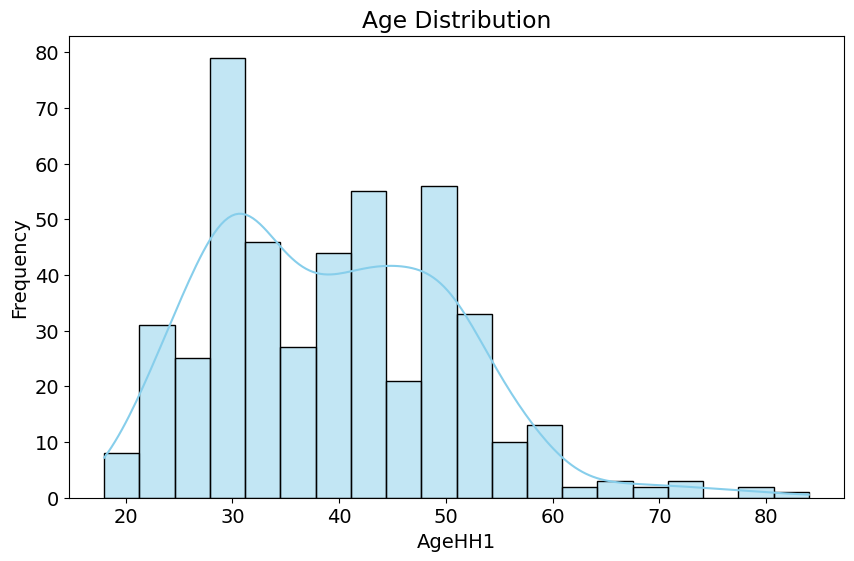

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cust3' is your DataFrame and 'AgeHH1' is the feature of interest
plt.figure(figsize=(10, 6))
sns.histplot(cust3['AgeHH1'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('AgeHH1')
plt.ylabel('Frequency')
plt.show()


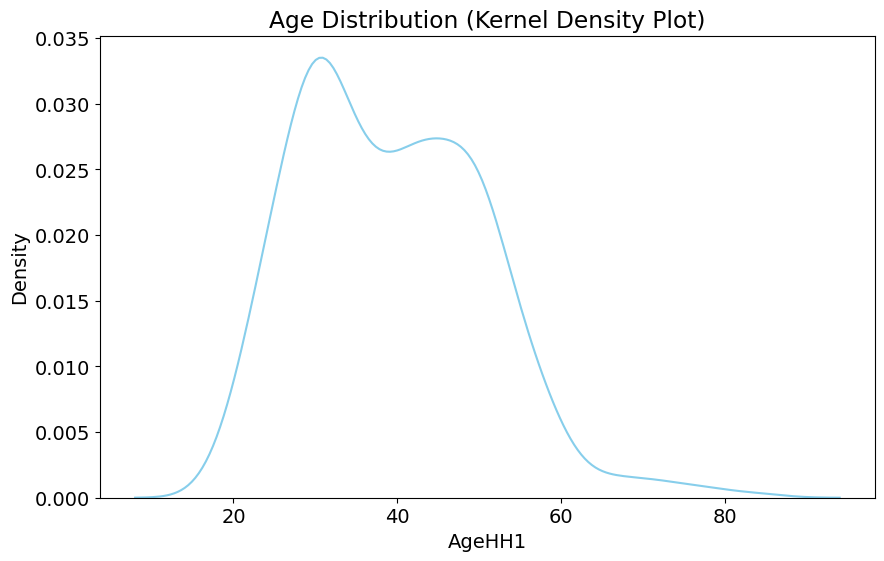

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cust3['AgeHH1'], color='skyblue')
plt.title('Age Distribution (Kernel Density Plot)')
plt.xlabel('AgeHH1')
plt.ylabel('Density')
plt.show()


In [ ]:
cust3

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
14,97.59,1804.0,24,3,3000342
34,109.47,2298.0,38,3,3000702
36,111.94,2060.0,36,3,3000754
38,166.43,2746.0,70,3,3000798
49,88.71,2215.0,56,3,3001042
...,...,...,...,...,...
19742,78.89,2300.0,30,3,3394466
19748,72.94,2712.0,46,3,3394610
19819,226.32,1924.0,48,3,3396326
19913,373.21,2858.0,50,3,3398254


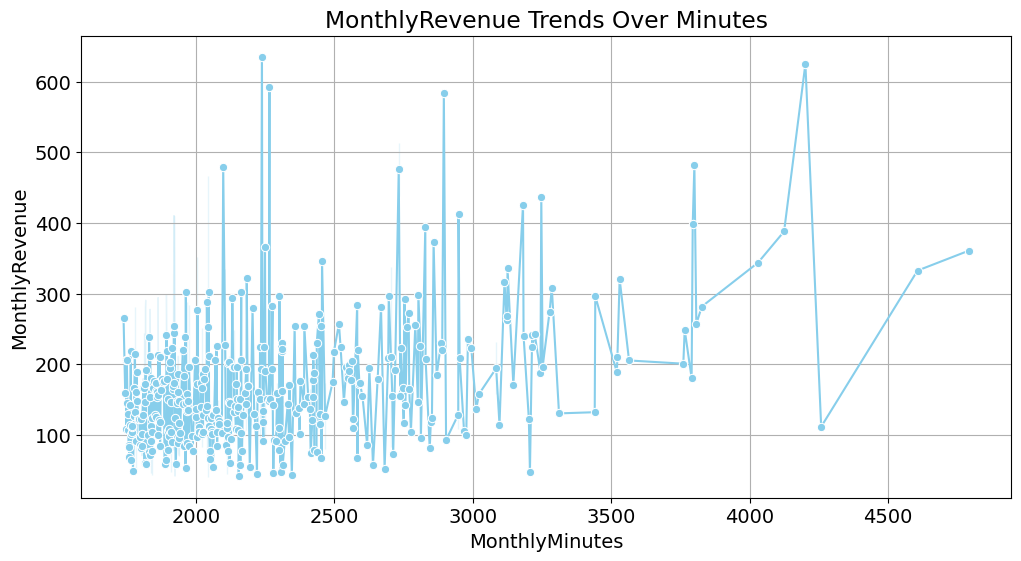

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cust3' is your DataFrame and 'MonthlyRevenue' is the feature of interest
plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthlyMinutes', y='MonthlyRevenue', data=cust3, marker='o', color='skyblue')
plt.title('MonthlyRevenue Trends Over Minutes')
plt.xlabel('MonthlyMinutes')
plt.ylabel('MonthlyRevenue')
plt.grid(True)
plt.show()


In [ ]:
cust3

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
14,97.59,1804.0,24,3,3000342
34,109.47,2298.0,38,3,3000702
36,111.94,2060.0,36,3,3000754
38,166.43,2746.0,70,3,3000798
49,88.71,2215.0,56,3,3001042
...,...,...,...,...,...
19742,78.89,2300.0,30,3,3394466
19748,72.94,2712.0,46,3,3394610
19819,226.32,1924.0,48,3,3396326
19913,373.21,2858.0,50,3,3398254


Usage Patterns:

Analyze how "MonthlyMinutes" correlates with "MonthlyRevenue" to understand usage patterns. This could provide insights into whether higher usage correlates with higher revenue.


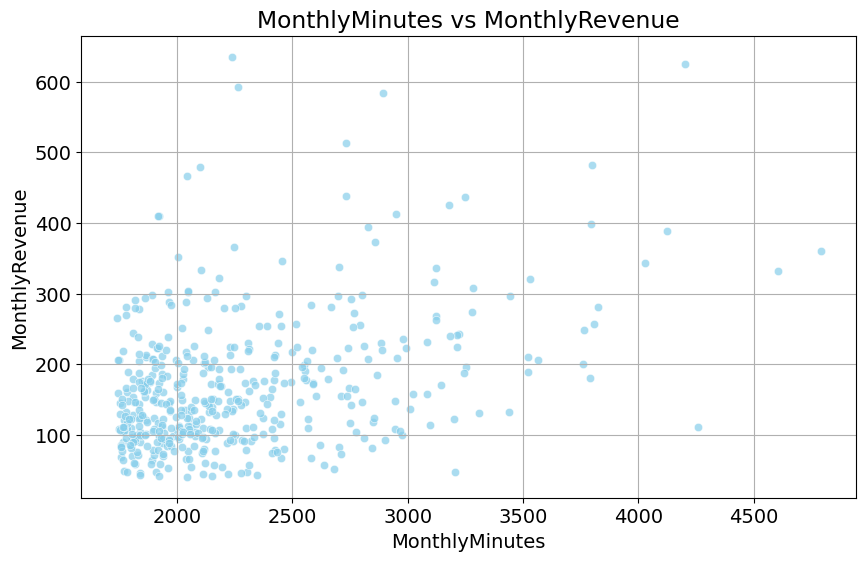

Correlation Coefficient: 0.3902534310230997


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cust3' is your DataFrame and 'MonthlyMinutes' and 'MonthlyRevenue' are the features of interest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyMinutes', y='MonthlyRevenue', data=cust3, color='skyblue', alpha=0.7)
plt.title('MonthlyMinutes vs MonthlyRevenue')
plt.xlabel('MonthlyMinutes')
plt.ylabel('MonthlyRevenue')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = cust3['MonthlyMinutes'].corr(cust3['MonthlyRevenue'])
print(f"Correlation Coefficient: {correlation_coefficient}")


In [ ]:
cust3

,MonthlyRevenue,MonthlyMinutes,AgeHH1,cluster,CustomerID
14,97.59,1804.0,24,3,3000342
34,109.47,2298.0,38,3,3000702
36,111.94,2060.0,36,3,3000754
38,166.43,2746.0,70,3,3000798
49,88.71,2215.0,56,3,3001042
...,...,...,...,...,...
19742,78.89,2300.0,30,3,3394466
19748,72.94,2712.0,46,3,3394610
19819,226.32,1924.0,48,3,3396326
19913,373.21,2858.0,50,3,3398254
